In [1]:
# import the data
import sinter
import matplotlib.pyplot as plt
from main.codes.tic_tac_toe.HoneycombCode import HoneycombCode
from main.codes.tic_tac_toe.FloquetColourCode import FloquetColourCode
import os
from scripts.line_fit_plots import *
from scripts.threshold_plot import *



In [2]:
fcc_data = dict()
hcc_data = dict()
for file in os.listdir('../data/'):
    os.system(f"sinter combine ../data/{file} > ../data/compress_{file}")
    new_samples = sinter.stats_from_csv_files('../data/compress_'+file)
    if new_samples[0].json_metadata['code'] == 'FloquetColourCode':
        fcc_data[new_samples[0].json_metadata['bias']] = new_samples

    elif new_samples[0].json_metadata['code'] == 'Honeycomb':
        hcc_data[new_samples[0].json_metadata['bias']] = new_samples


1
[8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 20, 20, 20, 20, 20]
[0.0042, 0.0044, 0.0041, 0.0043, 0.004, 0.004, 0.0041, 0.0042, 0.0043, 0.0044, 0.004, 0.0041, 0.0042, 0.0043, 0.0044, 0.004, 0.0041, 0.0042, 0.0043, 0.0044]
[0.09113544934162723, 0.10675829980684474, 0.08221551214694525, 0.09741157681520723, 0.0724545778411115, 0.050296755187800544, 0.06005236042224597, 0.06757916213459082, 0.07872332154103331, 0.09075306108004813, 0.035286413868127454, 0.04320008889610695, 0.05277679593570136, 0.06377153765007283, 0.07810468456825206, 0.023919653639978423, 0.032302965381432854, 0.04152902508258495, 0.05453941529129253, 0.06622849027314463]
2
[8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 20, 20, 20, 20, 20]
[0.004, 0.0041, 0.0042, 0.0044, 0.0043, 0.004, 0.0041, 0.0042, 0.0043, 0.0044, 0.004, 0.0041, 0.0042, 0.0043, 0.0044, 0.004, 0.0041, 0.0042, 0.0043, 0.0044]
[0.08946503076161516, 0.09479009077155824, 0.10436554980137684, 0.12563274842048408, 0.11534823632546658, 

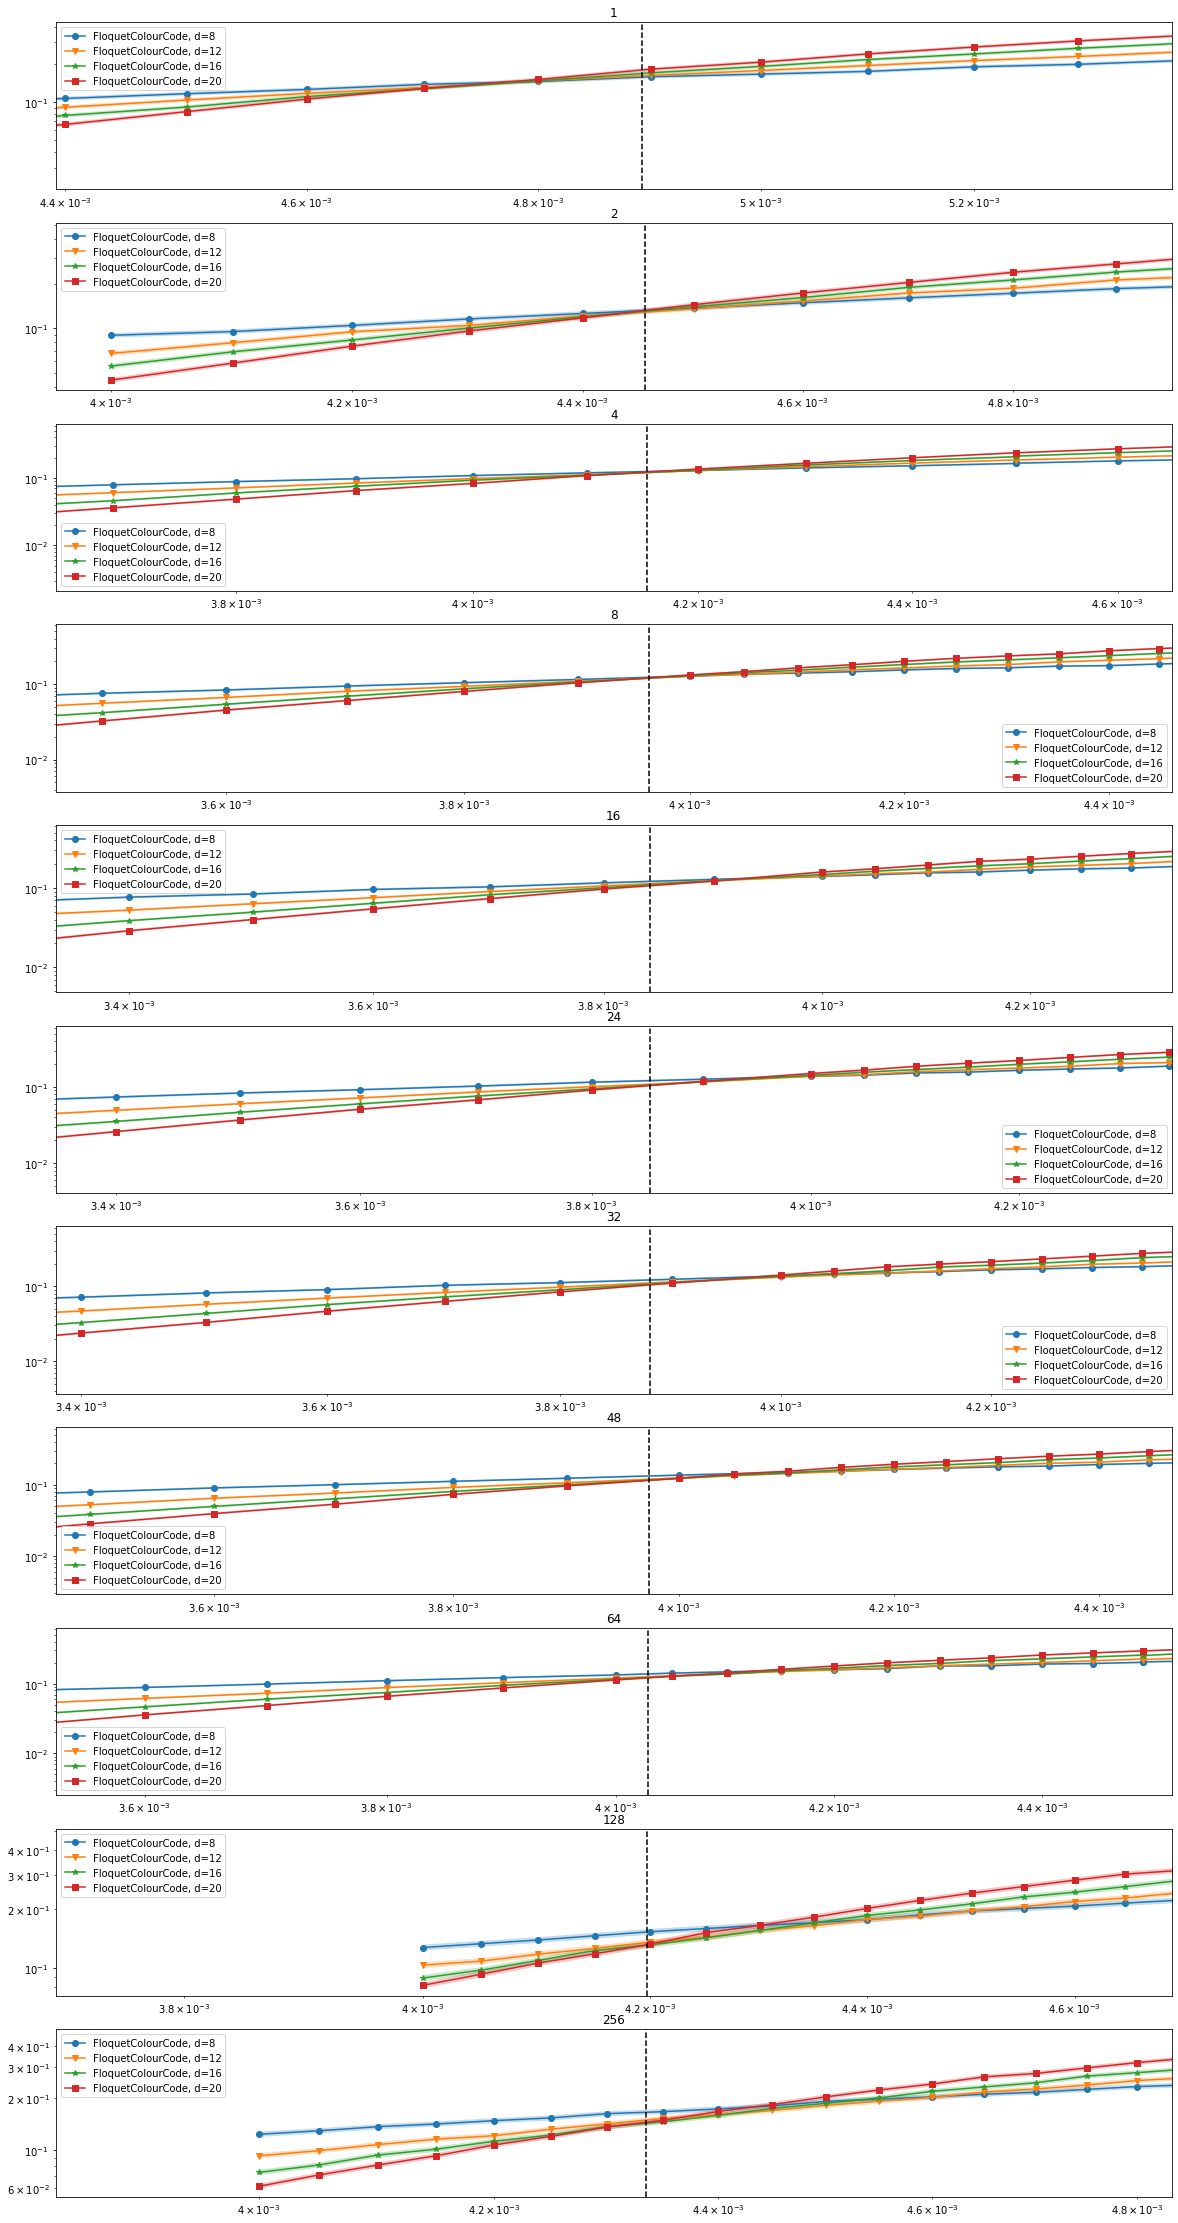

In [3]:
thresholds_fcc = dict()
fig, ax = plt.subplots(len(fcc_data.keys()),1, figsize=(20,40))
#code_constructor = FloquetColourCode
biases = list(fcc_data.keys())
biases.sort()
for index,bias in enumerate(biases):

    sinter.plot_error_rate(
                ax=ax[index],
                stats=fcc_data[bias],
                group_func=lambda stat: f"FloquetColourCode, d={stat.json_metadata['distance']}",
                x_func=lambda stat: stat.json_metadata['p'])
    print(bias)

#    samples_fcc = sinter.stats_from_csv_files("../data/compress_FloquetColourCode_bias_"+str(bias)+".csv")
#    if bias < 64:l
    if bias < 16:
        thresholds_fcc[bias] = get_one_threshold(fcc_data[bias], 1,0.003,0.0045,6)

    elif bias <256:
        thresholds_fcc[bias] = get_one_threshold(fcc_data[bias], 1,0.003,0.005,10)

    else:
        thresholds_fcc[bias] = get_one_threshold(fcc_data[bias], 1,0.004,0.007,10)

    ax[index].axvline(x=thresholds_fcc[bias], color="black", linestyle="dashed")
    ax[index].legend()
    ax[index].loglog()
    ax[index].set_xlim(thresholds_fcc[bias]-0.0005, thresholds_fcc[bias]+0.0005)
    ax[index].set_title(str(bias))


1
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
[0.0021, 0.0022, 0.0024, 0.0025, 0.0027, 0.0026, 0.0029, 0.0028, 0.0023, 0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0032, 0.0031, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039]
[0.007295, 0.009349, 0.013618186842661377, 0.016309912800746118, 0.022424529653591384, 0.019126042708748597

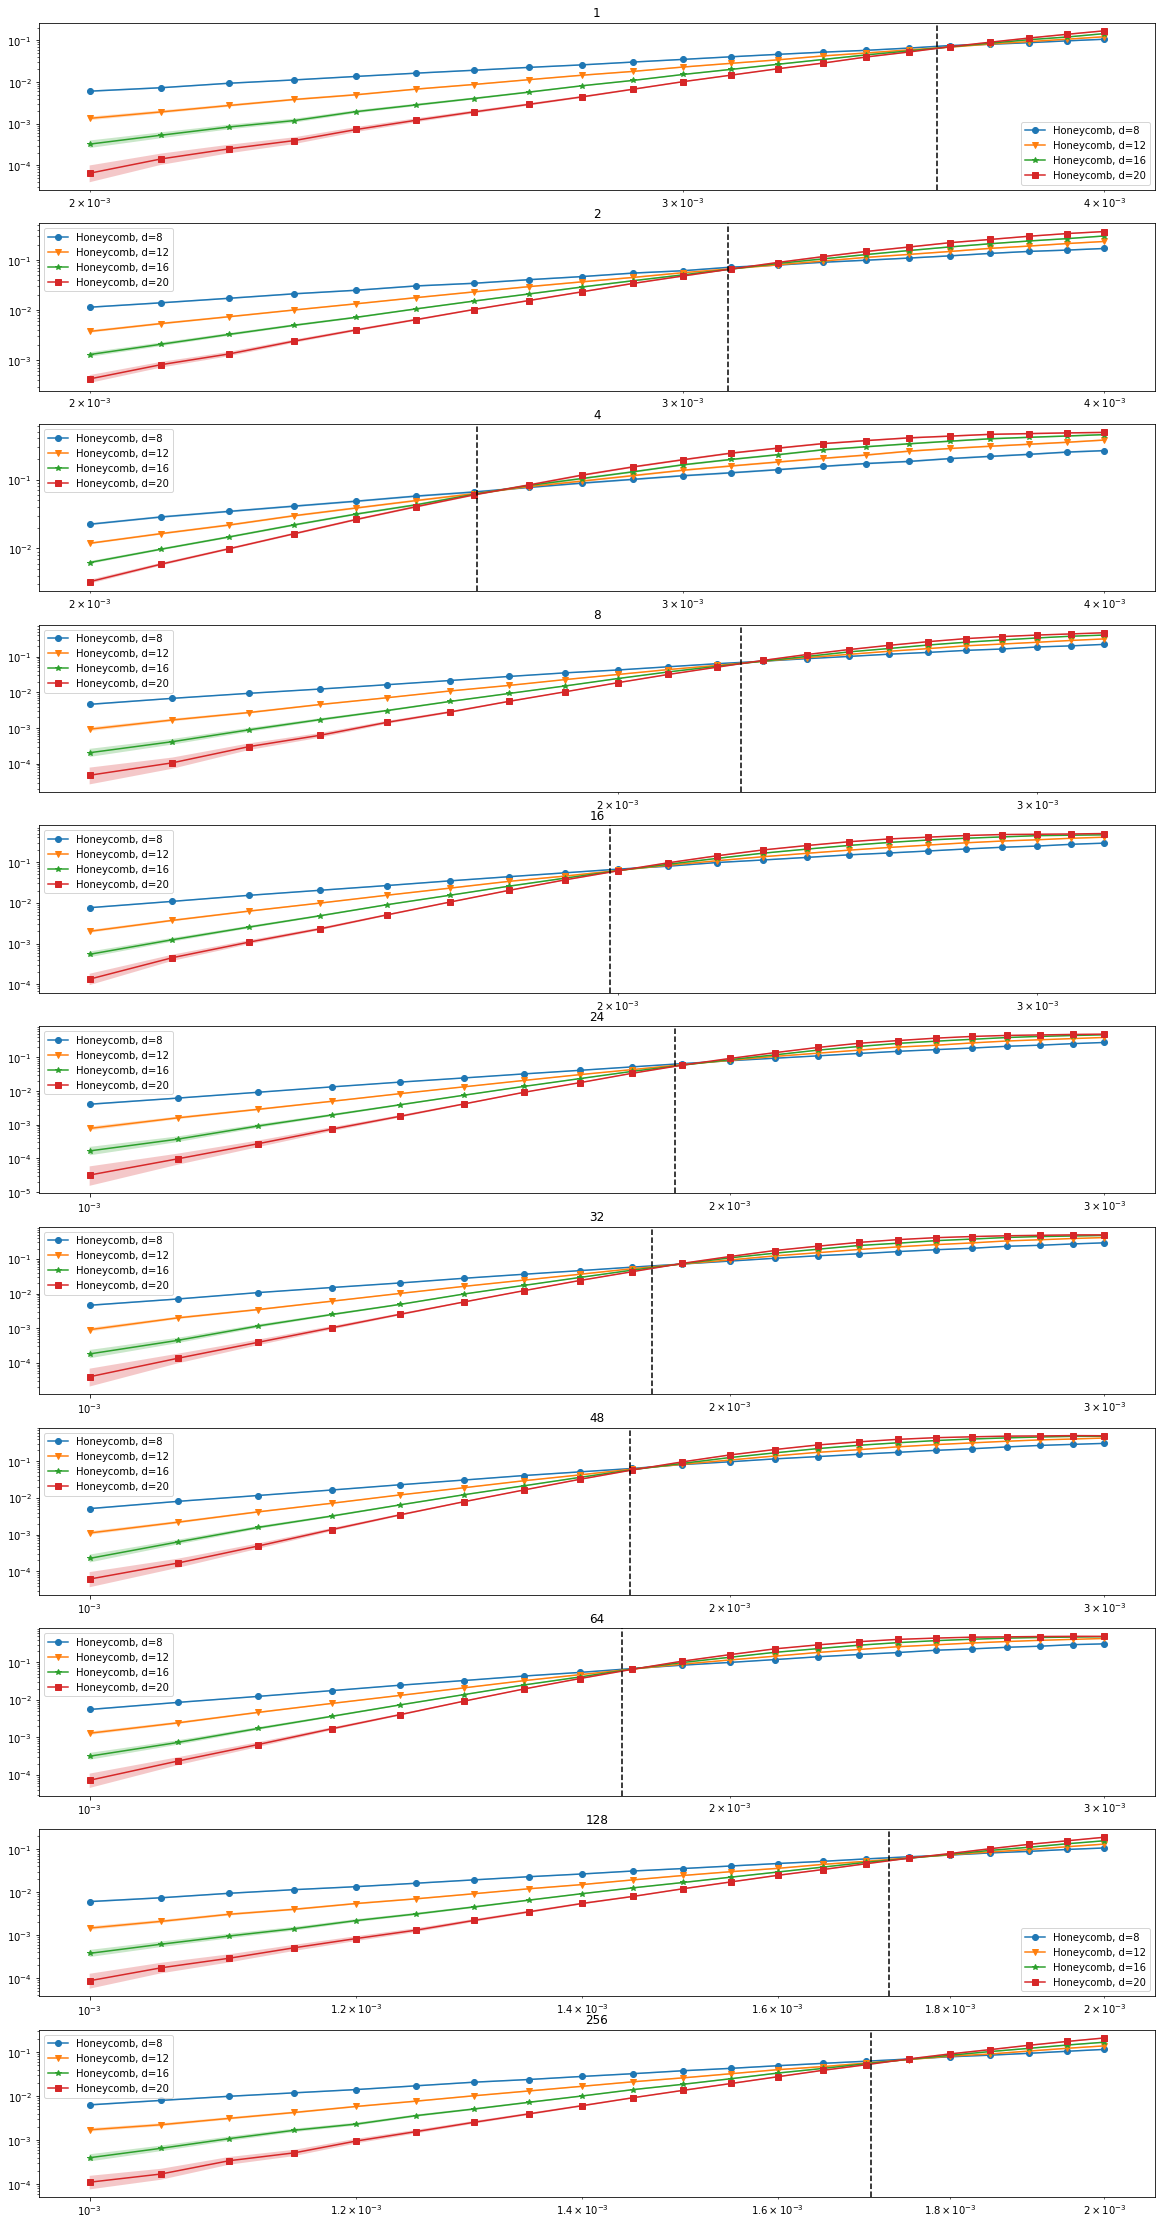

In [5]:
thresholds_hcc = dict()
fig, ax = plt.subplots(len(hcc_data.keys()),1, figsize=(20,40))
#code_constructor = FloquetColourCode
biases = list(hcc_data.keys())
biases.sort()
for index,bias in enumerate(biases):

    sinter.plot_error_rate(
                ax=ax[index],
                stats=hcc_data[bias],
                group_func=lambda stat: f"Honeycomb, d={stat.json_metadata['distance']}",
                x_func=lambda stat: stat.json_metadata['p'])
    print(bias)

#    samples_fcc = sinter.stats_from_csv_files("../data/compress_FloquetColourCode_bias_"+str(bias)+".csv")
    if bias < 8:
        thresholds_hcc[bias] = get_one_threshold(hcc_data[bias], 1,0.002,0.004,1)
    elif bias < 16:
        thresholds_hcc[bias] = get_one_threshold(hcc_data[bias], 1,0.0017,0.0037,1)
    else:
        thresholds_hcc[bias] = get_one_threshold(hcc_data[bias], 1,0.001,0.0035,1)

    ax[index].axvline(x=thresholds_hcc[bias], color="black", linestyle="dashed")
    ax[index].legend()
    ax[index].loglog()
  #  ax[index].set_xlim(thresholds_fcc[bias]-0.0005, thresholds_fcc[bias]+0.0005)
    ax[index].set_title(str(bias))

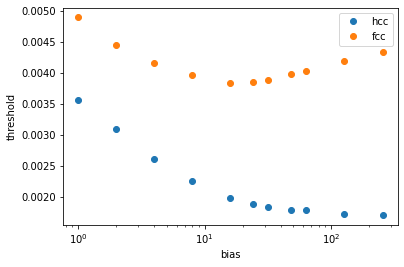

In [6]:
plt.plot(thresholds_hcc.keys(), thresholds_hcc.values(),'o',label='hcc')
plt.plot(thresholds_fcc.keys(), thresholds_fcc.values(),'o',label='fcc')
plt.ylabel('threshold')
plt.xlabel('bias')
plt.legend()
plt.xscale("log")

In [7]:
thresholds_hcc = dict()
fig, ax = plt.subplots(len(honeycomb_data.keys()),1, figsize=(20,20))
#code_constructor = FloquetColourCode
for index,bias in enumerate(honeycomb_data.keys()):

    sinter.plot_error_rate(
                ax=ax[index],
                stats=fcc_data[bias],
                group_func=lambda stat: f"FloquetColourCode, d={stat.json_metadata['distance']}",
                x_func=lambda stat: stat.json_metadata['p'])
    print(bias)

    samples_fcc = sinter.stats_from_csv_files("../data/FloquetColourCode_bias_"+str(bias)+".csv")
#    if bias < 64:
    thresholds_fcc[bias] = get_one_threshold(samples_fcc, 1)

    ax[index].axvline(x=thresholds_fcc[bias], color="black", linestyle="dashed")
    ax[index].legend()
    ax[index].loglog()
    ax[index].set_xlim(thresholds_fcc[bias]-0.001, thresholds_fcc[bias]+0.001)

NameError: name 'honeycomb_data' is not defined